In [1]:
%load_ext autoreload
%autoreload 2

from fastai.text.all import *

In [2]:
path = untar_data(URLs.IMDB_SAMPLE)
imdb = pd.read_csv(path/'texts.csv')

N = 40
imdb_sample = imdb.iloc[:N]

In [74]:
imdb_lm = TextDataLoaders.from_df(imdb_sample, text_col='text', 
                                  is_lm=True, bs=10)

/home/user/anaconda3/envs/devfastai/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [79]:
learn   = language_model_learner(imdb_lm, AWD_LSTM, 
             cbs = [ActivationStats(with_hist=False)],
                                 metrics=[accuracy]);

/mnt/c/Users/wsutt/Desktop/files/fastai2-dev/sutt-dev-fastai-wsl/fastai/callback/core.py:50: UserWarning: You are setting an attribute (__class__) that also exists in the learner, so you're not setting it in the learner but in the callback. Use `self.learn.__class__` otherwise.
  warn(f"You are setting an attribute ({name}) that also exists in the learner, so you're not setting it in the learner but in the callback. Use `self.learn.{name}` otherwise.")


In [81]:
learn.fit(1)

epoch,train_loss,valid_loss,accuracy,time
0,3.882987,3.114455,0.338889,00:15


In [82]:
list(learn.activation_stats.stats[0])

[None,
 None,
 [{'mean': -0.0022452559787780046,
   'std': 0.1623380184173584,
   'near_zero': 0.8167812017746914},
  {'mean': -0.0006662433152087033,
   'std': 0.16804148256778717,
   'near_zero': 0.8127604166666667},
  {'mean': -0.0019066664390265942,
   'std': 0.6523957252502441,
   'near_zero': 0.6053819444444445}],
 None,
 [{'mean': -0.00025025196373462677,
   'std': 0.0886622816324234,
   'near_zero': 0.87353515625},
  {'mean': -0.0008679843740537763,
   'std': 0.09241461753845215,
   'near_zero': 0.88671875},
  {'mean': -0.0033695572055876255,
   'std': 0.32651999592781067,
   'near_zero': 0.6311631944444445}],
 None,
 [{'mean': 0.001658876659348607,
   'std': 0.19772760570049286,
   'near_zero': 0.6155625},
  {'mean': 0.0005478939856402576,
   'std': 0.20536921918392181,
   'near_zero': 0.61925},
  {'mean': 0.001663033734075725,
   'std': 0.30244481563568115,
   'near_zero': 0.58825}],
 None,
 {'mean': 0.846173107624054,
  'std': 2.3526878356933594,
  'near_zero': 0.38581814236

#### Horsin Around

In [77]:
def flatten_tuple(o_tuple):
    res = []
    for it in o_tuple:
        if isinstance(it, tuple):
            res += flatten_tuple(it)
        else:
            res += [it]
    return tuple(res)

In [78]:
x = (1, (2,3), 4, (5,(6,7,(8,9))))
flatten_tuple(x)

(1, 2, 3, 4, 5, 6, 7, 8, 9)

In [56]:
import torch

In [57]:
a = torch.tensor([1,2,3])

In [58]:
type(a)

torch.Tensor

In [60]:
isinstance(a, Tensor)

True

In [ ]:
learn.activation_stats.st

In [31]:
list(learn.activation_stats.stats[0])[2]

{'mean': -0.001630931394174695,
 'std': 0.1619735062122345,
 'near_zero': 0.8172465760030864,
 'hist': tensor([376387.,  25205.,   9886.,   2093.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,      0.,
              0.,      0.,      0.,      0.,      0.,      0.,      0.,      0.])}

In [39]:
learn.activation_stats.hist(2)[0]

tensor([12.8384, 12.8397, 12.8437, 12.8458, 12.8418, 12.8476, 12.8384, 12.8464,
        12.8452, 12.8437, 12.8449, 12.0623])

In [24]:
import torch

In [25]:
a = torch.tensor([1,2,3,3,2])

In [27]:
a.float().histc(40,0,10)

tensor([0., 0., 0., 0., 1., 0., 0., 0., 2., 0., 0., 0., 2., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.])

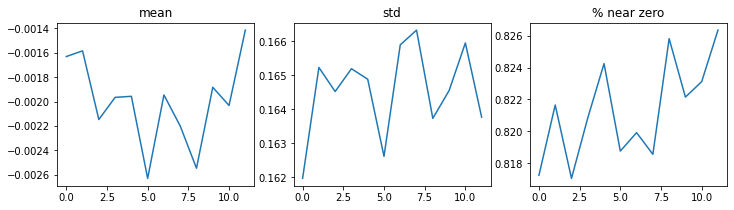

In [40]:
learn.activation_stats.plot_layer_stats(2)

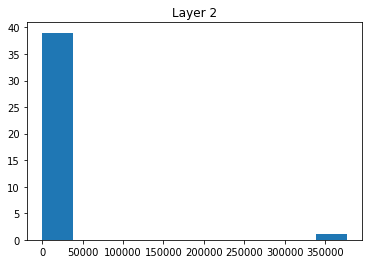

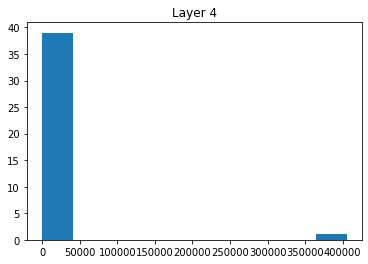

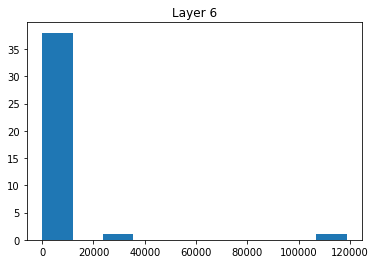

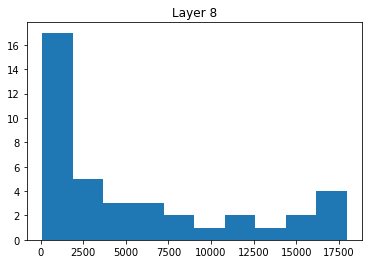

In [23]:
for i,e in enumerate(learn.activation_stats.stats[0]) :
    if isinstance(e, dict):
        data = e.get('hist', None)
        if data is None: continue
        try:
            print()
            plt.hist(data.numpy())
            plt.title(f'Layer {i}')
            plt.show()
        except:
            print(f'failed hist at layer {i}')
                  

In [17]:
plt.hist(data

tensor([17949., 17819., 17380., 16538., 15659., 14533., 13255., 11982., 10934.,
         9809.,  8785.,  7866.,  6865.,  6227.,  5480.,  4800.,  4340.,  3667.,
         3292.,  2977.,  2522.,  2285.,  1892.,  1678.,  1543.,  1255.,  1080.,
          973.,   807.,   681.,   581.,   491.,   409.,   344.,   284.,   234.,
          193.,   143.,   127.,    94.])